In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data = '/content/drive/MyDrive/Ds Data/tx_transfers_10-11-2020_etherum_tx_csv-000000000025.csv'

In [ ]:
graph1 = pd.read_csv(data, usecols= ['from_addr','to_addr'])
graph1

In [ ]:
df = pd.DataFrame(columns=['Nodes'])
df['Nodes'] = graph1['from_addr']

In [ ]:
df1 = pd.DataFrame(columns=['Nodes'])
df1['Nodes'] = graph1['to_addr']

In [ ]:
NodesDF = df.append(df1)
NodesDF = NodesDF.reset_index()
NodesDF = NodesDF.drop(columns = ['index'])
NodesDF

In [ ]:
NodesDF = NodesDF.drop_duplicates()
NodesDF = NodesDF.reset_index()
NodesDF = NodesDF.drop(columns = ['index'])
NodesDF

In [ ]:
NodesDF["Nodes"] = NodesDF["Nodes"].astype("string")

In [ ]:
list(NodesDF.index[NodesDF['Nodes']=='0x057eaa8d407a0a19d635399629b42c2a19c9a593'])[0]


776738

In [ ]:
del graph1, df, df1

In [16]:
DG = nx.DiGraph()
nodesList =[]
with open(data) as f:        
  next(f)                                           
  for line in f:                   
    lis = line.split(',')                           
    from_addr = lis[1]                     
    to_addr = lis[2]
    DG.add_edge(from_addr,to_addr)

In [18]:
count =0
DG = nx.DiGraph()
nodesList =[]
with open(data) as f:        
  next(f)                                           
  for line in f:   
    if count < 50:
      count +=1                       
      lis = line.split(',')                           
      from_addr = lis[1]                     
      to_addr = lis[2]
      gas_fees = int(lis[8])
      if from_addr not in nodesList:
        nodesList.append(from_addr)
      if to_addr not in nodesList:
        nodesList.append(to_addr)
      DG.add_edge(nodesList.index(from_addr), nodesList.index(to_addr), weight = gas_fees)

In [19]:
dfsTree = nx.dfs_tree(DG)
dfsTree.edges()

OutEdgeView([(0, 1), (2, 3), (3, 16), (3, 19), (3, 63), (3, 74), (3, 80), (3, 86), (4, 5), (6, 7), (8, 9), (10, 11), (12, 13), (14, 15), (14, 62), (15, 75), (17, 18), (20, 21), (22, 23), (23, 36), (24, 25), (26, 27), (28, 29), (30, 31), (32, 33), (34, 35), (37, 38), (39, 40), (41, 42), (43, 44), (45, 46), (47, 48), (49, 50), (51, 52), (51, 53), (54, 55), (56, 57), (58, 59), (60, 61), (64, 65), (66, 67), (68, 69), (70, 71), (72, 73), (76, 77), (78, 79), (81, 82), (84, 85), (87, 88)])

In [10]:
dfsTree.edges()

In [ ]:
nx.dag_longest_path(DG)

In [ ]:
import pylab
import networkx as nx
pos=nx.circular_layout(DG)
pylab.figure(4,figsize=(13,13))
nx.draw(DG,pos, with_labels=True)
pylab.show()

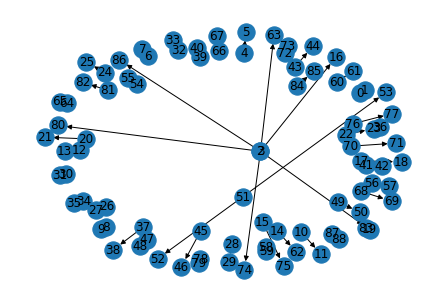

In [ ]:
nx.draw(DG, with_labels= True)

In [ ]:
list(nx.dfs_edges(DG, source=22))

[(22, 23), (23, 36)]

In [ ]:
NodesDF

,Nodes
0,0x47ddfddff875851ba18526cb30e0d35868c8c79a
1,0x0c4a68cf6857cc76fe946d04fe85fac5fae9625e
2,0xac6cfbfb9ee02e270f695c6dee900db112bc0d6b
3,0x4b85c3f0e56ba18714a966c4f56e08c413070904
4,0xab5c66752a9e8167967685f1450532fb96d5d24f
...,...
776736,0xfe62cf9b3a1b4cd309a67f93de394db6660c2f5f
776737,0xab15994b1a977d9f26d062586d2c26a270a3c698
776738,0x057eaa8d407a0a19d635399629b42c2a19c9a593
776739,0x81618ea925764727d04e2446a4e301a6689d11f9


In [ ]:
for index, row in nodesDF.iterrows():
    print(row['c1'])

In [ ]:
maxdfsEdges = []
count =0
maxDfsEdgesLen = -np.inf
with open(data) as f:        
  next(f)                                           
  for line in f:  
    from_addr = lis[1]
    count +=1
    print(count)
    dfsEdges = list(nx.dfs_edges(DG, source=from_addr))
    DfsEdgesLen = len(dfsEdges)
    if DfsEdgesLen > maxDfsEdgesLen:
      maxDfsEdgesLen = DfsEdgesLen
      maxdfsEdges = dfsEdges
print(maxdfsEdges)

In [ ]:
maxdfsEdges = []
maxDfsEdgesLen = -np.inf
for i in range(len(nodesList)):
  
  dfsEdges = list(nx.dfs_edges(DG, source=i))
  DfsEdgesLen = len(dfsEdges)
  #print(DfsEdgesLen)
  if DfsEdgesLen > maxDfsEdgesLen:
     maxDfsEdgesLen = DfsEdgesLen
     #print(maxDfsEdgesLen)
     maxdfsEdges = dfsEdges
print(maxdfsEdges)

[(2, 3), (3, 16), (3, 19), (3, 63), (3, 74), (3, 80), (3, 86)]


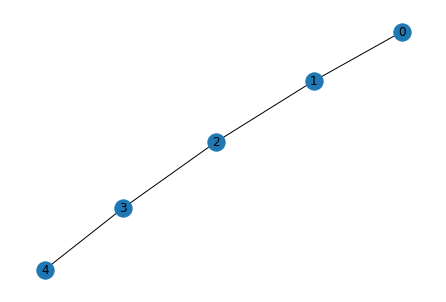

In [ ]:
G = nx.path_graph(5)
nx.draw(G,with_labels=True)

In [ ]:
T = nx.dfs_tree(G, source=0, depth_limit=2)
list(T.edges())
T = nx.dfs_tree(G, source=0)
list(T.edges())

[(0, 1), (1, 2), (2, 3), (3, 4)]

In [ ]:
len(list(nx.simple_cycles(DG)))

In [ ]:
import pandas as pd

In [ ]:
with open(data) as f:        
  next(f)  
  for line in f:                          
    lis = line.split(',')                           
    from_addr = lis[1]                     
    to_addr = lis[2]
    print(nx.dijkstra_path(DG, from_addr, to_addr))

In [ ]:
list(nx.topological_sort(DG))

NetworkXUnfeasible: ignored

In [ ]:
nx.draw(DG)

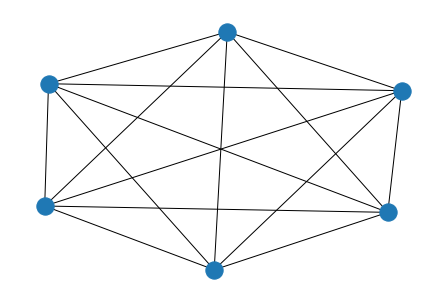

In [ ]:
G = nx.complete_graph(6)
 
# illustrate graph
nx.draw(G)

In [ ]:
# Python program to print topological sorting of a DAG
from collections import defaultdict

# Class to represent a graph


class Graph:
	def __init__(self, vertices):
		self.graph = defaultdict(list) # dictionary containing adjacency List
		self.V = vertices # No. of vertices

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	# A recursive function used by topologicalSort
	def topologicalSortUtil(self, v, visited, stack):

		# Mark the current node as visited.
		visited[v] = True

		# Recur for all the vertices adjacent to this vertex
		for i in self.graph[v]:
			if visited[i] == False:
				self.topologicalSortUtil(i, visited, stack)

		# Push current vertex to stack which stores result
		stack.append(v)

	# The function to do Topological Sort. It uses recursive
	# topologicalSortUtil()
	def topologicalSort(self):
		# Mark all the vertices as not visited
		visited = [False]*self.V
		stack = []

		# Call the recursive helper function to store Topological
		# Sort starting from all vertices one by one
		for i in range(self.V):
			if visited[i] == False:
				self.topologicalSortUtil(i, visited, stack)

		# Print contents of the stack
		print(stack[::-1]) # return list in reverse order


# Driver Code
g = Graph(6)
g.addEdge(5, 2)
g.addEdge(5, 0)
g.addEdge(4, 0)
g.addEdge(4, 1)
g.addEdge(2, 3)
g.addEdge(3, 5)

print ("Following is a Topological Sort of the given graph")

# Function Call
g.topologicalSort()

# This code is contributed by Neelam Yadav


Following is a Topological Sort of the given graph
[4, 2, 3, 5, 1, 0]
